In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls

all_data.csv	  gradebook.db	    pandas_seaborn.ipynb   student_db.tsv
basel		  LICENSE	    python_tutorial.ipynb  tests.py
func_data.nii.gz  mystery_data.npy  README.md		   Untitled.ipynb


In [3]:
all_data = pd.read_csv('all_data.csv')

In [4]:
all_data.head()

,RT,acc_spd,accuracy,angle,block,coherence,dataset,id,left_right,subj_idx,tdcs,trial_NR
0,799,spd,1,180,1,0.4171,berkeley,S1.1,2,1,sham,1
1,613,spd,1,180,1,0.4171,berkeley,S1.1,2,1,sham,2
2,627,spd,1,180,1,0.4171,berkeley,S1.1,1,1,sham,3
3,1280,acc,0,180,1,0.4171,berkeley,S1.1,1,1,sham,4
4,800,spd,1,180,1,0.4171,berkeley,S1.1,2,1,sham,5


In [5]:
all_data['dataset'].value_counts()

amsterdam    18000
berkeley     18000
leiden       16800
Name: dataset, dtype: int64

In [17]:
all_data.groupby(['dataset', 'subj_idx', 'tdcs'])['RT'].median()

dataset    subj_idx  tdcs  
amsterdam  2         anodal    566.0
                     sham      533.5
           3         anodal    517.0
                     sham      500.0
           4         anodal    600.0
                     sham      616.0
           5         anodal    400.0
                     sham      466.0
           6         anodal    517.0
                     sham      450.0
           7         anodal    584.0
                     sham      575.5
           8         anodal    534.0
                     sham      484.0
           10        anodal    484.0
                     sham      451.0
           11        anodal    450.0
                     sham      484.0
           12        anodal    667.0
                     sham      609.0
           13        anodal    567.0
                     sham      501.0
           14        anodal    500.0
                     sham      534.0
           15        anodal    517.0
                     sham      533.0
          

In [14]:
all_data.head()

,RT,acc_spd,accuracy,angle,block,coherence,dataset,id,left_right,subj_idx,tdcs,trial_NR
0,799,spd,1,180,1,0.4171,berkeley,S1.1,2,1,sham,1
1,613,spd,1,180,1,0.4171,berkeley,S1.1,2,1,sham,2
2,627,spd,1,180,1,0.4171,berkeley,S1.1,1,1,sham,3
3,1280,acc,0,180,1,0.4171,berkeley,S1.1,1,1,sham,4
4,800,spd,1,180,1,0.4171,berkeley,S1.1,2,1,sham,5


In [25]:
med_RTs = all_data.pivot_table(index=['subj_idx', 'dataset'], columns=['tdcs', 'acc_spd'], aggfunc=np.median)[['RT']]
mean_RTs = all_data.pivot_table(index=['subj_idx', 'dataset'], columns=['tdcs', 'acc_spd'], aggfunc=np.mean)[['RT']]

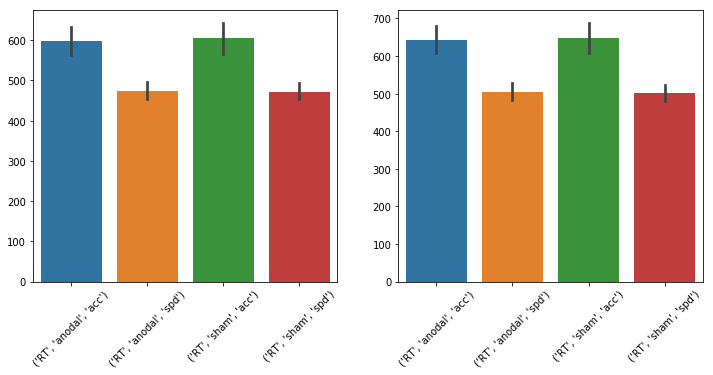

In [27]:
f, sps = plt.subplots(1,2, figsize=(12,5))
bp = sns.barplot(data=med_RTs, ax=sps[0])
for item in bp.get_xticklabels():
    item.set_rotation(45)
bp = sns.barplot(data=mean_RTs, ax=sps[1])
for item in bp.get_xticklabels():
    item.set_rotation(45)

In [ ]:
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
